In [165]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

In [166]:
# copy of stat
stat = rf[rf["job_title"] == "Statistician"].copy()
stat["month_number"] = rf["date"].dt.month
stat_exp = stat.explode("skills_list")

# let's npw pivot it
stat_pivot = stat_exp.pivot_table(index="month_number",  columns="skills_list",aggfunc="size", fill_value=0)
# fill_value - means fill out Nan values with actual numbers
stat_pivot.loc["Total"] = stat_pivot.sum()
# sorting by total row
sorted_pivot = stat_pivot[stat_pivot.loc["Total"].sort_values(ascending=False).index]
sorted_pivot = sorted_pivot.drop("Total")
sorted_pivot 

skills_list,Probability,Regression,SAS,Data Analysis,Python,R,Data Cleaning,Machine Learning,Statistics
month_number,,,,,,,,,
1,1,1,1,0,0,0,0,0,0
2,1,1,1,0,0,0,1,1,1
3,0,0,0,1,1,1,0,0,0
7,2,2,2,0,0,0,0,0,0
9,1,1,1,1,1,1,0,0,0
11,0,0,0,1,1,1,0,0,0
12,0,0,0,0,0,0,1,1,1


'\nIn month 7, the skills Probability, Regression, and SAS appeared 2 times each.\n\nIn month 2, there were 2 job listings, and skills like Data Cleaning, Machine Learning, and Statistics each appeared once.\n\npivot_percent is a percentage breakdown of how often each skill appears in job listings per month.'

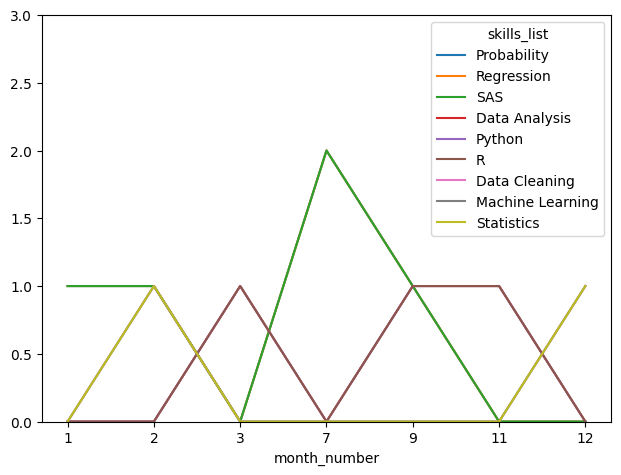

In [167]:
# A DataFrame is a 2D table, like a whole spreadsheet. A Series is like a single column or row of that table.

sorted_pivot.plot(kind="line")
plt.tight_layout()
plt.ylim(0,3)
# let's now calculate the percent of skill appearing relative to all job postings
total_month = stat.pivot_table(index="month_number", aggfunc="size")

pivot_percent =  sorted_pivot.div(total_month/100, axis=0)
pivot_percent

"""pivot_percent = sorted_pivot.div(total_month / 100, axis=0)

total_month / 100 converts row counts into per-1% units.

.div(..., axis=0) divides each row in sorted_pivot by the corresponding row value from total_month / 100.

So, for example, in month 2, total_month = 2, and 2 / 100 = 0.02.

Then, if a cell in sorted_pivot for month 2 is 1, it becomes:

1 / 0.02 = 50.0
So this means: that skill appeared in 50% of the jobs in month 2.


If month 2 had 2 job listings, and "Data Cleaning" appeared in 1 listing:

1 / (2 / 100) = 1 / 0.02 = 50%
""" 

"""
In month 7, the skills Probability, Regression, and SAS appeared 2 times each.

In month 2, there were 2 job listings, and skills like Data Cleaning, Machine Learning, and Statistics each appeared once.

pivot_percent is a percentage breakdown of how often each skill appears in job listings per month."""



In [168]:
# let's now instead of month number show the actual month name
pivot_percent.index
pivot_percent = pivot_percent.reset_index()
pivot_percent["month_name"] = pivot_percent["month_number"].apply(lambda x: pd.to_datetime(x,format="%m").strftime("%b"))
pivot_percent

# format="%m" tells pandas: “Treat the input as a month number.”
# .strftime("%b") formats a datetime object to return only the three-letter abbreviation of the month.
"""dt = pd.to_datetime("1", format="%m")  # → 1900-01-01
dt.strftime("%b")  # → 'Jan'
Format Code	Meaning	Example
%b	Abbreviated month	'Jan'
%B	Full month name	'January'
%m	Month number	'01'
%Y	Year	'1900'
%d	Day	'01
'"""
pivot_percent.set_index("month_name", inplace=True)
pivot_percent.drop(columns="month_number", inplace=True)

# """Format Code	Meaning	Example
# %d	Day of the month (01–31)	"05"
# %m	Month as number (01–12)	"04"
# %b	Abbreviated month name	"Apr"
# %B	Full month name	"April"
# %y	Year without century (00–99)	"25" → 2025
# %Y	Year with century	"2025"
# %H	Hour (00–23)	"14"
# %I	Hour (01–12)	"02"""

# """f"{int(x):02}"
# f"...": → This is an f-string (formatted string literal) in Python.

# int(x) → Converts x to an integer, just in case it’s a float or string.

# :02 → This is a format specifier:

# 0 → Pad with zeroes if needed.

# 2 → Total width = 2 characters."""




0 Probability
1 Regression
2 SAS
3 Data Analysis
4 Python


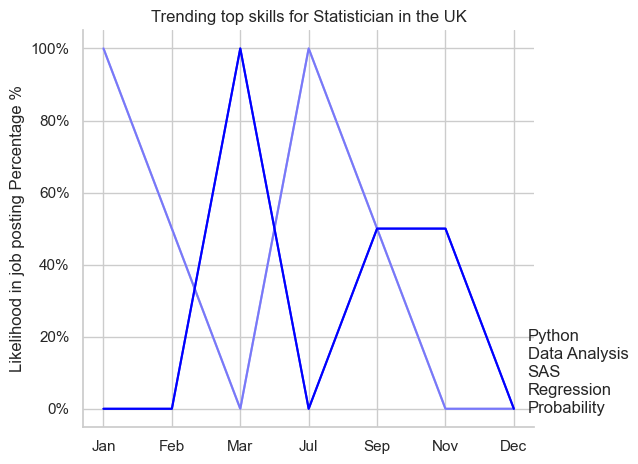

In [ ]:
for_plotting = pivot_percent.iloc[:,:5]


import seaborn as sns

sns.lineplot(data=for_plotting, dashes=False, palette="light:blue", legend=False)
sns.set_theme(style="whitegrid")
plt.title("Trending top skills for Statistician in the UK")
plt.xlabel("")
plt.ylabel("Likelihood in job posting Percentage %")

for_plotting

off_set = 5
for i, column in enumerate(for_plotting.columns):
    print(i,column)
    last_value = for_plotting[column].iloc[-1]
    plt.text(len(for_plotting) - 1 + 0.2, last_value + off_set * i, column, va='center')

plt.tight_layout()
sns.despine()
# despine removes the vertical line of the figure at the end 

"""let now add percetanges to the y ax"""

from matplotlib.ticker import  PercentFormatter
ourx = plt.gca()
ourx.yaxis.set_major_formatter(PercentFormatter(decimals=False))
plt.show()

"""In Matplotlib:

Major ticks = the main ticks (e.g., every 10% or every 1.0).

Minor ticks = smaller intermediate ticks (e.g., 1%, 2%, ..., between the 10% intervals).

So, set_major_formatter() tells Matplotlib how to display the text labels for major ticks.

Where:

ax is a Matplotlib Axes object.

formatter is an instance of a formatter class, like:

matplotlib.ticker.FuncFormatter

matplotlib.ticker.PercentFormatter

matplotlib.ticker.StrMethodFormatter"""

"""from matplotlib.ticker import FuncFormatter

def custom_format(x, pos):
    return f"{x*100:.1f}%"

ourx.yaxis.set_major_formatter(FuncFormatter(custom_format))
This will also show percentages but with 1 decimal place, and you can add logic based on position if needed"""


Use this when you want full control over how tick labels are displayed by writing your own formatting logic.

Example 1: Show as percentages with 1 decimal

from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create dummy data
x = [0.1, 0.2, 0.3, 0.4, 0.5]
y = [10, 20, 30, 40, 50]

plt.plot(x, y)

# Define custom formatting function
def to_percent(x, pos):
    return f"{x * 100:.1f}%"

# Apply formatter to x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))

plt.title("Custom % Formatter on X-axis")
plt.show()


 Example 2: Add units (e.g., "kg") to Y-axis values

 def add_kg(x, pos):
    return f"{x} kg"

plt.plot(x, y)
plt.gca().yaxis.set_major_formatter(FuncFormatter(add_kg))
plt.title("Y-axis with 'kg' unit")
plt.show(




StrMethodFormatter — Simple String Formatting:

Use this when formatting can be done with basic Python f-string-style placeholders.


from matplotlib.ticker import StrMethodFormatter

# Example: Format as integer with 'kg'
plt.plot(x, y)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:.0f} kg"))
plt.title("Y-axis with 'kg' using StrMethodFormatter")
plt.show()

Example 2: Format as currency with 2 decimals

plt.plot(x, y)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.2f}"))
plt.title("Currency Format on Y-axis")
plt.show()




In [ ]:
"""Feature	FuncFormatter	StrMethodFormatter
Flexibility	Full — write your own Python logic	Simple — just format strings
Performance	Slightly slower (function call)	Faster for simple needs
Use case	Dynamic labels, complex formats	Clean formatting (currency, decimals)
Input params	x, pos (value, position)	Just {x} inside a string"""